# Hands-on Explainable AI (XAI): From Data Understanding to Model Interpretation


## Explainable AI: Intro, Concepts and Methods 


**Author:** Anahid Wachsenegger (anahid.wachsenegger@ait.ac.at)

**Date:** 2026.02.20


### Abstract

* The successful performance of high-complex Machine Learning (ML) models has led to their popularity in multiple industrial and research applications. 
* However, due to their inherent opaqueness, these models are known as black-box and, therefore, are prohibited from full deployment in high-risk and critical domains. 
* As a result, eXplainable Artificial Intelligence (XAI) research aims to develop model-specific or post-hoc methods to reduce the uncertainty of learning procedures and increase the interpretability of these ML models.
* Widespread examples of some post-hoc approaches are SHapley Additive Explanations (SHAP) and Local Interpretable Model-Agnostic Explanations (LIME). 


In this lecture, we cover the main concepts, terminology, and scopes of XAI approaches. We further explain the differences between the existing methodologies using some Jupyter notebook examples.


### The Popularity
<img src="Figures/ai-applications.png" width="800" height="640">




### Black-Box vs Glass-Box
<img src="Figures/Black-Box-vs-Glass-Box.png" width="800" height="640">


### The Black-Box Property

source: https://towardsdatascience.com/why-we-will-never-open-deep-learnings-black-box-4c27cd335118#:~:text=What%20is%20the%20black%20box,is%20doing%20on%20its%20own.

<img src="Figures/Black-Box-Property.png" width="800" height="640">



### The Motivation
<img src="Figures/motivation.png" width="800" height="640">
img source: https://zapier.com/blog/science-of-motivation/

* Curiosity / learning

* Understanding the model's sucess and failing 

* Is the model/data biased?

* How can we increase trust and acceptance of using such systems?

* How can I improve my model's performance?

* Is my model fair? Is is safe (privacy)? Is it reliable (robust)?

* Correlation vs Causality


### XAI Terminology
#### Transparency
<img src="Figures/transparency.png" width="800" height="640">

img source: https://www.clearlypayments.com/blog/a-culture-of-radical-transparency/

__**(Lipton et al. 2018) introduces three levels of transparency**__

* **Simulatability** - user has the input data and model parameter and can repeat the predictions over a “reasonable time”



* **Decomposability** - each part of the model (Input data parameters, calculations) has to be interpretable. Features must be interpretable



* **Algorithmic transparency** - clearly generating model parameters and predictions, e.g., for a linear model, the shape of the loss surface is understandable and can be shown to converge to a unique solution.



#### Interpretability

<img src="Figures/Interpretability_1.png" width="800" height="640">
img source: https://hai.stanford.edu/news/should-ai-models-be-explainable-depends (Nigam Shah,  Stanford Institute for Human-Centered Artificial Intelligence)

* Interpretability is a passive characteristic of a model

* interpretability=transparency - when the model itself provides explanations for its decisions

* Explainability is an activity characteristic of a model an approach is needed to provide an explanation for the model decision

* Interpretability compromises explainability


### Types of explanations: 
<img src="Figures/statistical_visualization.png" width="800" height="640">
img source: https://www.centralgalaxy.com/how-to-visualize-statistical-data/ (Shah, Prof of medical informatic at the Stanford Institute for Human-Centered Artificial Intelligence)

* Surrogate/Proxy models

* Factual and counterfactuals

* Statistical visualizations

* Feature importance 

* Model Internals

* rule-based


### Types of explainability
<img src="Figures/XAI_strategy.png" width="800" height="640">



## Scope of explainations

<img src="Figures/xai_scope.png" width="1000" height="840">


## Summary of Terminology

<img src="Figures/terminology.png" width="800" height="640">
img source: https://www.researchgate.net/publication/342358253_Explainable_Deep_Learning_Models_in_Medical_Image_Analysis 


-----

This notebook demonstrates explainability techniques on a classical tabular classification problem: the Iris dataset.

Tabular data allows us to interpret explanations in terms of meaningful feature names (e.g., petal length, sepal width). This makes it an ideal starting point for understanding core XAI concepts.

We will:

1. Describe and explore the dataset
2. Train a classification model
3. Apply multiple explainability methods:
   - Partial Dependence Plots (PDP)
   - Accumulated Local Effects (ALE)
   - SHAP (feature attribution)
   - LIME (local surrogate explanation)
   - DiCE (counterfactual explanations)

The goal is not only to achieve good predictive performance, but to understand *how* and *why* the model makes decisions.


## The Iris Dataset

The Iris dataset contains 150 samples of iris flowers from three species:

- Setosa
- Versicolor
- Virginica

Each sample has four numerical features:

1. Sepal length (cm)
2. Sepal width (cm)
3. Petal length (cm)
4. Petal width (cm)

The task is to classify the species based on these measurements.

# Imports

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data

In [17]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

class_names = iris.target_names

df = X.copy()
df["species"] = y

df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

In [18]:
df.shape

(150, 5)

In [19]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Pre-Training Analysis/Explanation (Exploratory ANalysis)

In [20]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [21]:
df["species"].value_counts()


species
0    50
1    50
2    50
Name: count, dtype: int64

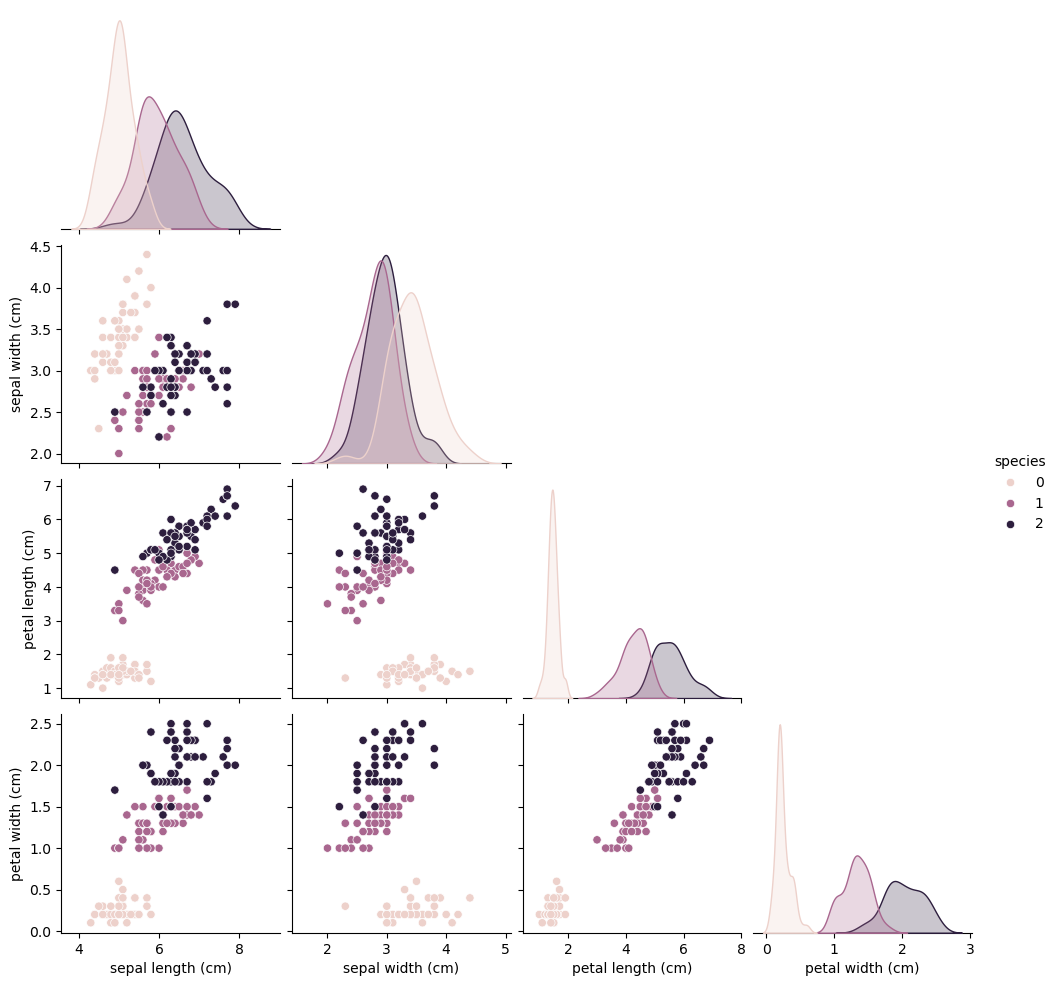

In [22]:
sns.pairplot(df, hue="species", corner=True)
plt.show()

# Model Training

We choose a Random Forest classifier because:

* Strong performance
* Non-linear decision boundaries
* Well-supported by XAI libraries

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=4,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Explainability
## Partial Dependence Plots (PDP)

Partial Dependence Plots show the marginal effect of one feature on the predicted outcome, averaging over all other features.

They answer:

> "How does the prediction change when we vary one feature, keeping others fixed?"

<img src="Figures/pdp.png" width="800" height="640">

* Xs is the targeted feature(s) (mostly 2)

* XC, are the rest of the features

* Partial dependence works by marginalizing the machine learning model output over the distribution of the features in set C

* the function shows the relationship between the features in set S we are interested in and the predicted outcome


In [24]:
from sklearn.inspection import PartialDependenceDisplay

In [25]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

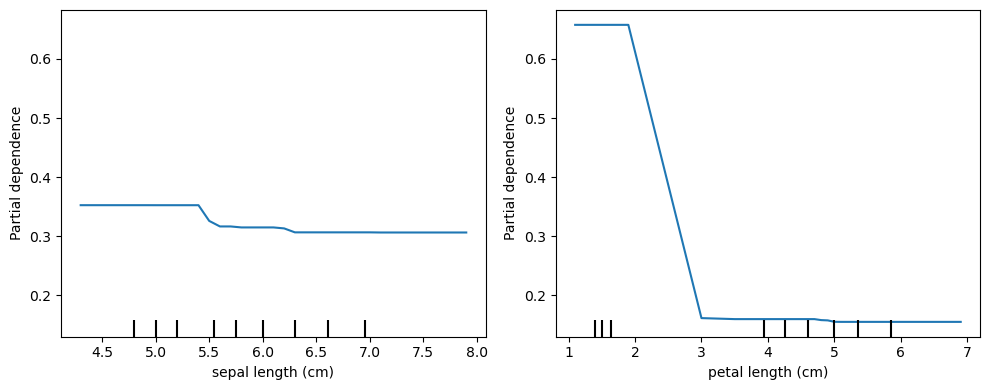

In [10]:
features = [0, 2]  # sepal length and petal length

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # two panels because you have 2 features
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features,
    target=0,
    ax=ax
)
plt.tight_layout()
plt.show()


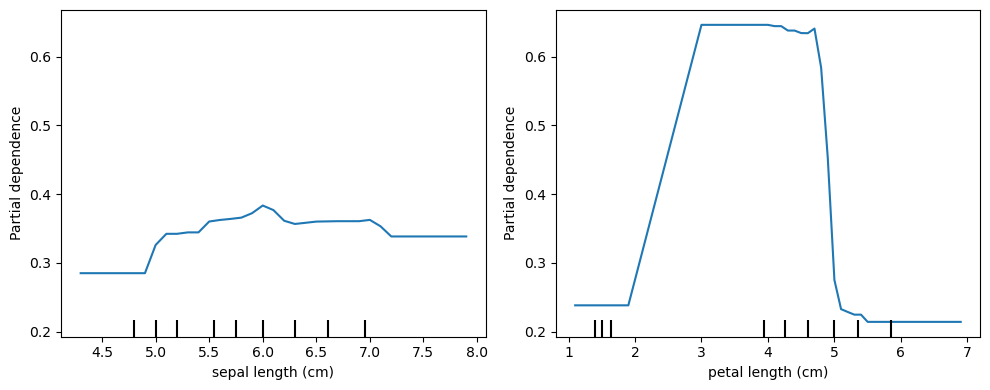

In [26]:
features = [0, 2]  # sepal length and petal length

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # two panels because you have 2 features
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features,
    target=1,
    ax=ax
)
plt.tight_layout()
plt.show()

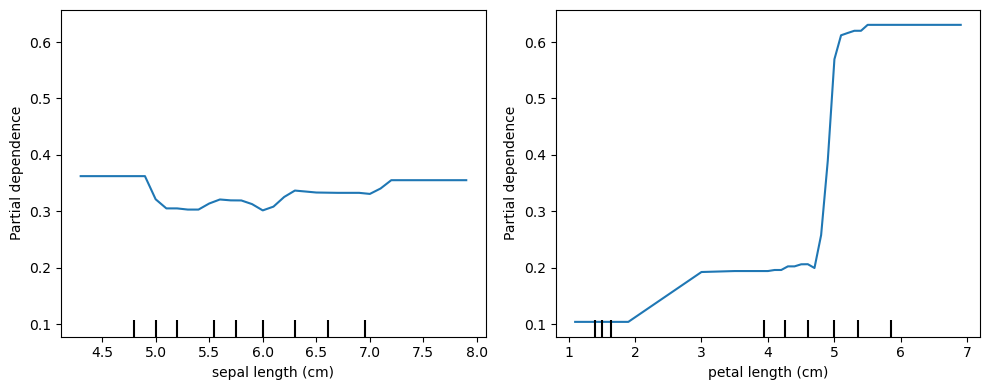

In [27]:
features = [0, 2]  # sepal length and petal length

fig, ax = plt.subplots(1, 2, figsize=(10, 4))  # two panels because you have 2 features
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features,
    target=2,
    ax=ax
)
plt.tight_layout()
plt.show()

## Accumulated Local Effects (ALE)

<img src="Figures/ale.png" width="800" height="640">

In [28]:
!pip install alibi

Defaulting to user installation because normal site-packages is not writeable


In [29]:
import warnings
warnings.filterwarnings("ignore")

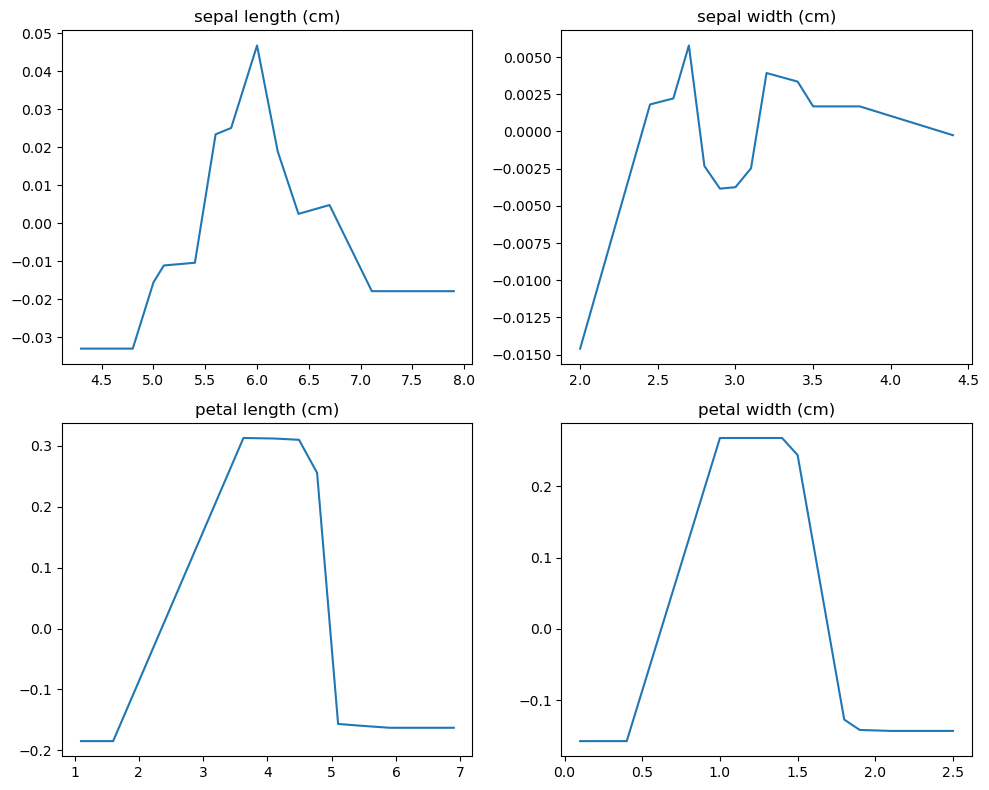

In [30]:
from alibi.explainers import ALE

ale = ALE(model.predict_proba, feature_names=X.columns.tolist())

exp = ale.explain(X_train.to_numpy())

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, ax in enumerate(axes.flatten()):
    ax.plot(exp.feature_values[i], exp.ale_values[i][:, 1])
    ax.set_title(X.columns[i])
plt.tight_layout()
plt.show()

## Local Interpretable Model Agnostic Explanations (LIME)

<img src="Figures/lime.png" width="1200" height="1040">

In [12]:
!pip install lime

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from lime.lime_tabular import LimeTabularExplainer

lime_explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    class_names=class_names.tolist(),
    mode="classification"
)

idx = 0
exp = lime_explainer.explain_instance(
    X_test.iloc[idx].values,
    model.predict_proba
)

exp.show_in_notebook(show_table=True)

In [40]:
idx = 2
exp = lime_explainer.explain_instance(
    X_test.iloc[idx].values,
    model.predict_proba,
    labels=(1,)
)

exp.show_in_notebook(show_table=True)

In [39]:
idx = 10
exp = lime_explainer.explain_instance(
    X_test.iloc[idx].values,
    model.predict_proba,
    labels=(2,)
)

exp.show_in_notebook(show_table=True)

In [36]:
idx = 11
exp = lime_explainer.explain_instance(
    X_test.iloc[idx].values,
    model.predict_proba, labels=(2,)
)

exp.show_in_notebook(show_table=True)

## SHapely Additive exPlanations (SHAP)### (Global + Local Feature Attribution)

* Perturbation-based interpretability methods

<img src="Figures/shap.png" width="1200" height="1040">


In [ ]:
!pip install shap

In [41]:
import shap

### Global explanations

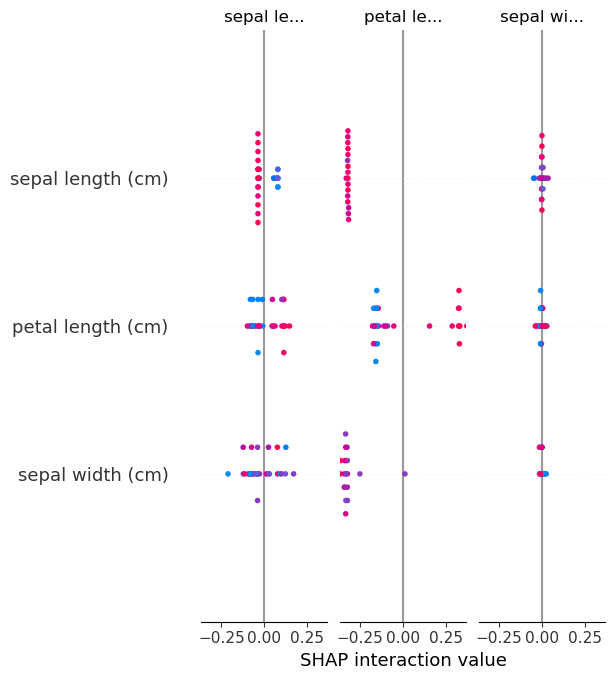

In [42]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [51]:
def get_class_shap_matrix(shap_values, class_idx):
    """
    Returns SHAP values for one class as shape (n_samples, n_features)
    for both list-style and 3D-array-style outputs.
    """
    if isinstance(shap_values, list):
        sv = shap_values[class_idx]
        sv = np.asarray(sv)
        sv = np.squeeze(sv)

        if sv.ndim != 2: # Expect (n_samples, n_features)
            raise ValueError(f"Unexpected per-class SHAP shape: {sv.shape}")
        return sv

    sv = np.asarray(shap_values)

    if sv.ndim == 3:
        return sv[:, :, class_idx]

    if sv.ndim == 3 and sv.shape[0] == len(class_names):
        return sv[class_idx, :, :]

    raise ValueError(f"Unexpected SHAP array shape: {sv.shape}")

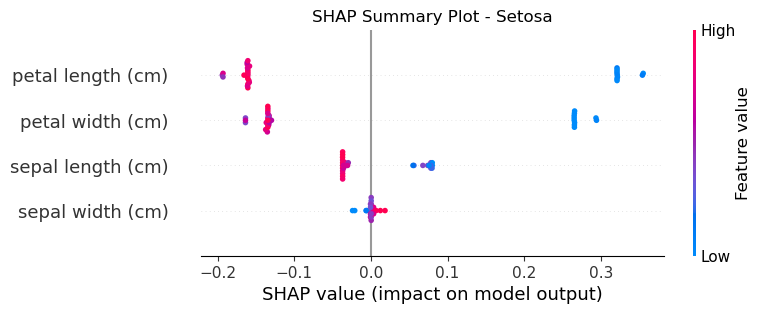

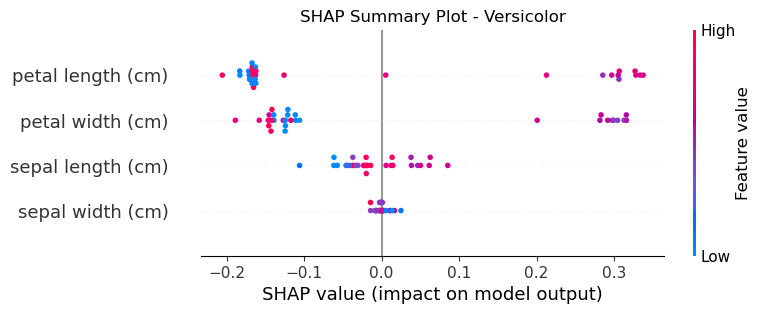

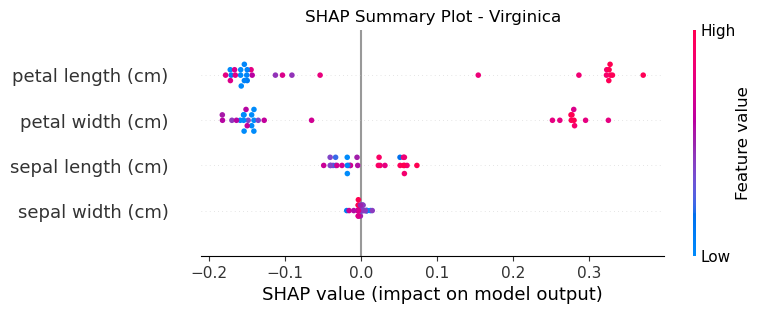

In [52]:
for i, cname in enumerate(class_names):
    sv_i = get_class_shap_matrix(shap_values, i)

    shap.summary_plot(
        sv_i,
        X_test,
        feature_names=X_test.columns,
        show=False
    )
    plt.title(f"SHAP Summary Plot - {cname}")
    plt.show()

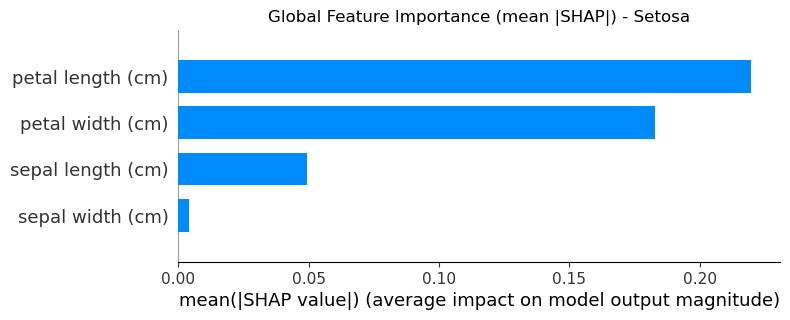

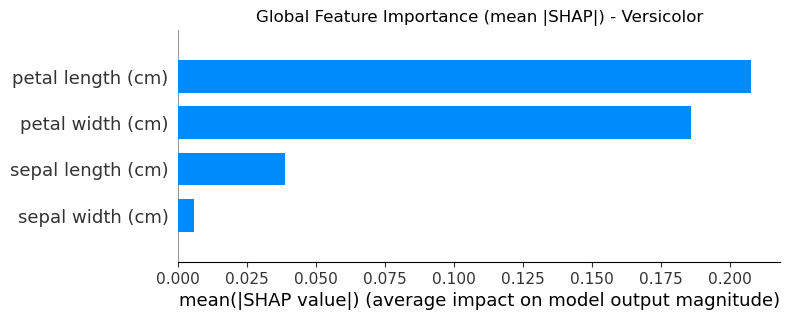

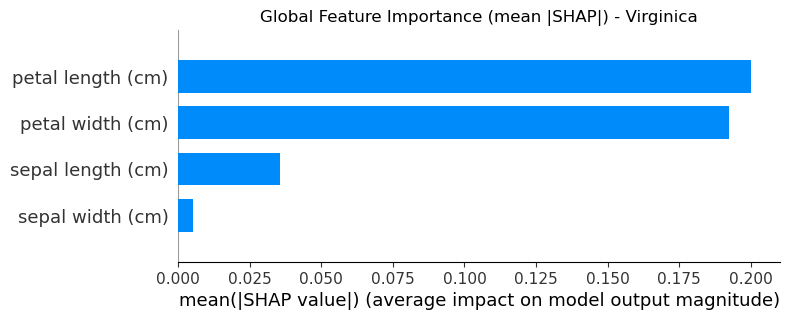

In [50]:
for i, cname in enumerate(class_names):
    sv_i = get_class_shap_matrix(shap_values, i)

    shap.summary_plot(
        sv_i,
        X_test,
        feature_names=X_test.columns,
        plot_type="bar",
        show=False
    )
    plt.title(f"Global Feature Importance (mean |SHAP|) - {cname}")
    plt.show()

### Local explanations

In [73]:
model.predict(X_test.iloc[[idx]])

array([2])

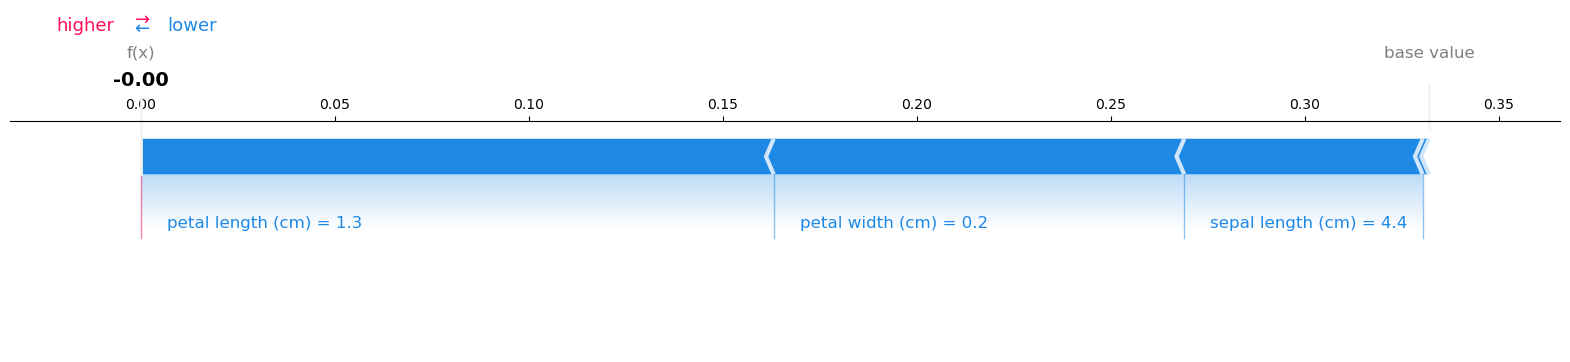

In [75]:
# Create an Explanation object for X_test
explainer = shap.TreeExplainer(model)
sv = explainer(X_test)   # sv is an Explanation object

idx = 0
class_id = 1  # e.g., versicolor

shap.plots.force(sv[idx, :, class_id], matplotlib=True)

In [60]:
idx = 23
exp = lime_explainer.explain_instance(
    X_test.iloc[idx].values,
    model.predict_proba,
    labels=(2,)
)

exp.show_in_notebook(show_table=True)

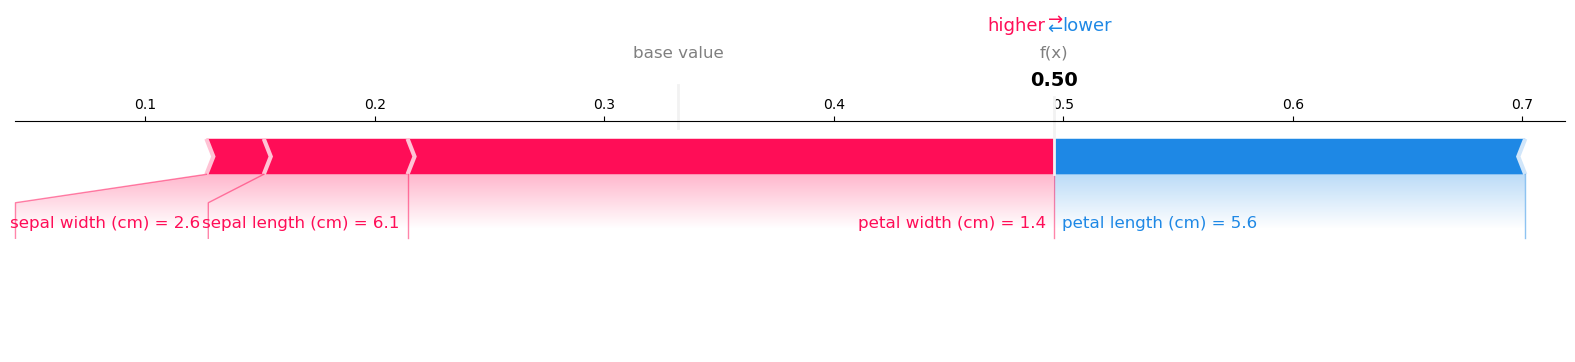

In [61]:
# Create an Explanation object for X_test
explainer = shap.TreeExplainer(model)
sv = explainer(X_test)   # sv is an Explanation object

idx = 23
class_id = 1  # e.g., versicolor

shap.plots.force(sv[idx, :, class_id], matplotlib=True)

In [57]:
class_names

['Setosa', 'Versicolor', 'Virginica']

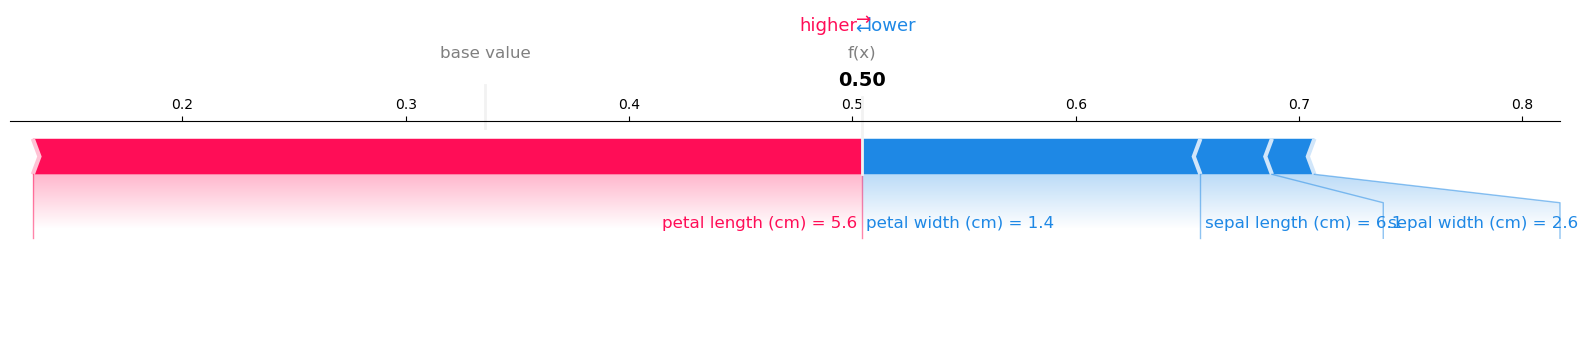

In [62]:
explainer = shap.TreeExplainer(model)
sv = explainer(X_test)   # sv is an Explanation object

idx = 23
class_id = 2 

shap.plots.force(sv[idx, :, class_id], matplotlib=True)

## DiCE (Counterfactual Explanations)
https://interpret.ml/DiCE/

<img src="Figures/dice.png" width="800" height="750">

In [17]:
! pip install dice-ml

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 84.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.7/131.7 MB 75.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 MB 54.5 MB/s eta 0:00:0000:0100:01


In [76]:
import dice_ml
from dice_ml import Dice

In [77]:
outcome_name = "species"
backend = "sklearn"

continuous_features = df.drop(columns=[outcome_name]).columns.tolist()

data_dice = dice_ml.Data(
    dataframe=df,
    continuous_features=continuous_features,
    outcome_name=outcome_name
)

model_dice = dice_ml.Model(model=model, backend=backend)

dice = Dice(data_dice, model_dice, method="random")

In [79]:
query = X_test.iloc[[2]]

# Current prediction
pred = int(model.predict(query)[0])
print("Predicted:", class_names[pred])

# Desired class (next class)
desired_target = (pred + 1) % 3
print("Desired target:", class_names[desired_target])

# Generate counterfactuals
counterfactuals = dice.generate_counterfactuals(
    query_instances=query,
    total_CFs=2,
    desired_class=desired_target
)

counterfactuals.visualize_as_dataframe()

Predicted: Versicolor
Desired target: Virginica


100%|██████████| 1/1 [00:00<00:00, 10.48it/s]

Query instance (original outcome : 1)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.9               2.4                3.3               1.0   

   species  
0        1


Diverse Counterfactual set (new outcome: 2)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.9               2.4                3.3               2.2   
1                6.5               2.4                6.1               1.0   

   species  
0        2  
1        2

In [80]:
uery = X_test.iloc[[2]]
pred = int(model.predict(query)[0])
print("Predicted:", class_names[pred])

for target in [c for c in range(3) if c != pred]:
    print("\nTarget:", class_names[target])
    cfs = dice.generate_counterfactuals(query, total_CFs=1, desired_class=target)
    cfs.visualize_as_dataframe()

Predicted: Versicolor

Target: Setosa


100%|██████████| 1/1 [00:00<00:00, 11.64it/s]

Query instance (original outcome : 1)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.9               2.4                3.3               1.0   

   species  
0        1


Diverse Counterfactual set (new outcome: 0)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.9               3.3                3.3               0.5   

   species  
0        0


Target: Virginica


100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

Query instance (original outcome : 1)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.9               2.4                3.3               1.0   

   species  
0        1


Diverse Counterfactual set (new outcome: 2)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.6               2.4                3.3               2.0   

   species  
0        2



# Summary

- PDP shows global marginal feature effects.
- ALE corrects for feature correlation bias.
- SHAP provides additive feature attributions.
- LIME approximates the model locally using a linear surrogate.
- DiCE generates actionable counterfactual examples.

Together, these methods provide complementary insights:

- Global understanding (PDP, ALE)
- Feature importance (SHAP)
- Local reasoning (LIME)
- Decision boundary manipulation (DiCE)

For tabular data like Iris, explanations are more directly interpretable than image heatmaps, making it an excellent starting point for learning XAI.
